In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

path = os.getenv('PATH_CSV')
path_dir_model = os.getenv('PATH_DIR_MODEL')

In [3]:
songs_df = pd.read_csv(path)
songs_df

,aaaaaaah,aaron,ab,abacinate,abacus,abandon,abandoned,abandoning,abate,aberration,...,youtopia,yuh,yup,zakk,zeal,zero,zeroes,zeros,еye,Explicit Content
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
X = songs_df.drop(['Explicit Content'], axis=1)
y = songs_df['Explicit Content']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=46, test_size=0.2)

In [6]:
from GLA import NaiveBayesClassifier

nb_frm_scratch = NaiveBayesClassifier()
nb_frm_scratch.fit(X_train, y_train)
y_pred = nb_frm_scratch.predict(X_test)

In [7]:
from sklearn.naive_bayes import MultinomialNB

sk_MNB = MultinomialNB()
sk_MNB.fit(X_train, y_train)
sk_pred = sk_MNB.predict(X_test)

In [8]:
from sklearn.naive_bayes import MultinomialNB

sk_BNB = MultinomialNB()
sk_BNB.fit(X_train, y_train)
sk_BNB_pred = sk_BNB.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_from_scratch = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_from_scratch}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


# Print the confusion matrix
print("Confusion Matrix:")
from_scratch_cf = confusion_matrix(y_test, y_pred)
print(from_scratch_cf)

Accuracy: 0.6453900709219859
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.70      0.74       105
           1       0.36      0.50      0.42        36

    accuracy                           0.65       141
   macro avg       0.58      0.60      0.58       141
weighted avg       0.69      0.65      0.66       141

Confusion Matrix:
[[73 32]
 [18 18]]


In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_MNB = accuracy_score(y_test, sk_pred)
print(f"Accuracy: {accuracy_MNB}")


# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, sk_pred))


# Print the confusion matrix
print("Confusion Matrix:")
sk_cf = confusion_matrix(y_test, sk_pred)
print(sk_cf)

Accuracy: 0.6453900709219859
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       105
           1       0.34      0.42      0.38        36

    accuracy                           0.65       141
   macro avg       0.56      0.57      0.56       141
weighted avg       0.67      0.65      0.66       141

Confusion Matrix:
[[76 29]
 [21 15]]


In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_BNB = accuracy_score(y_test, sk_BNB_pred)
print(f"Accuracy: {accuracy_BNB}")


# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, sk_BNB_pred))


# Print the confusion matrix
print("Confusion Matrix:")
sk_NBN_cf = confusion_matrix(y_test, sk_BNB_pred)
print(sk_NBN_cf)

Accuracy: 0.6453900709219859
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       105
           1       0.34      0.42      0.38        36

    accuracy                           0.65       141
   macro avg       0.56      0.57      0.56       141
weighted avg       0.67      0.65      0.66       141

Confusion Matrix:
[[76 29]
 [21 15]]


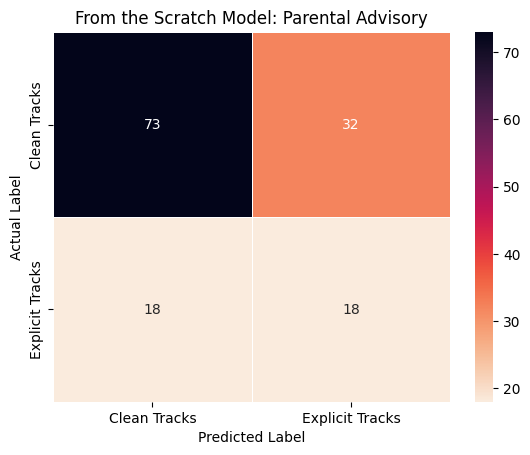

In [12]:
import seaborn as sns

Class_lst = ["Clean Tracks", "Explicit Tracks"]
music_rated = pd.DataFrame(from_scratch_cf, index=Class_lst, columns=Class_lst )

sns.heatmap(music_rated ,annot=True, linewidths=0.5, cmap="rocket_r")
plt.title("From the Scratch Model: Parental Advisory")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

In [13]:
import joblib

joblib.dump(nb_frm_scratch, f"{path_dir_model}nb_frm_scratch_model.joblib");

In [14]:
import pickle

with open(f"{path_dir_model}nb_frm_scratch_model.pkl", 'wb') as file:
    pickle.dump(nb_frm_scratch, file)

In [37]:
artist_name = input('Artist Name: ')
song_title = input('Song Title: ')

In [39]:
from new_data import Tranform_New_Data

new_data_ini = Tranform_New_Data(songs_df.columns, artist_name, song_title)
new_data = new_data_ini.new_data();

In [40]:
loaded_model = joblib.load(f"{path_dir_model}nb_frm_scratch_model.joblib")
predictions = loaded_model.predict(new_data)

In [41]:
predictions

array([0])

$$
X_j
$$